In [1]:
%load_ext autoreload
%autoreload 2
    
from importlib import reload
import numpy as np
import dataset
from dataset import *

from utils import *
import utils


In [531]:
from dataset import *

study = "two"
df = get_data(study)
idvar = "uid" if study=="one" else "id"

if study=="one":
    feat_cols = ['uid', 'lalco', 'ldep', 'llife', 'lcrim', 'ralco', 'rdep', 'rlife', 'rcrim', 'chosen', 
                 'alcodiff', 'depdiff', 'lifediff', 'crimdiff', 'secElasped']
    diffcols = ['lifediff', 'crimdiff', 'alcodiff', 'depdiff']
    
    reg_columns = range(9, 13)
if study=="two":
    feat_cols = ['id', 'l_elderlyDep', 'l_lifeYearsGained', 'l_obesity', 'l_weeklyWorkhours', 'l_yearsWaiting', 
                 'r_elderlyDep', 'r_lifeYearsGained', 'r_obesity', 'r_weeklyWorkhours', 'r_yearsWaiting', 
                 'eldepdiff', 'lifediff', 'obesdiff', 'workdiff', 'waitdiff', 'chosen', 'secElasped']
    diffcols = ['eldepdiff', 'lifediff', 'obesdiff', 'workdiff', 'waitdiff']
    reg_columns = range(11, 16)

df_lim = df[feat_cols]
users = df_lim[idvar].unique()

In [451]:
def user_logit_scores(df_user):
    df_user = df_user[diffcols + ["chosen"]]
    df_user['score'] = 0
    
    indices = list(range(len(df_user)))
    step = int(len(indices)/5)
    
    for r in range(5):
    
        test = indices[r*step:(r+1)*step]
        train = [i for i in indices if i not in test]
        
        # train, test = sklearn.model_selection.train_test_split(indices, test_size=0.2)
    
        logm = LogisticRegression(fit_intercept=False).fit(df_user.iloc[train][diffcols], df_user.iloc[train]['chosen'])
        coefs = logm.coef_[0]
        coefs = coefs/np.linalg.norm(coefs)
        score = 0
        for i, col in enumerate(diffcols):
            score += coefs[i] * df_user.iloc[test][col]
    
        all_scores = []
        for i, ind in enumerate(df_user.index):
            if i in test:
                all_scores.append(np.abs(score[ind]))
            else:
                all_scores.append(0)
            
        df_user['score'] += np.array(all_scores)
    return df_user['score']

df_lim['score'] = 0
for user in tqdm(users):    
    df_lim.loc[df_lim[idvar] == user, 'score'] = user_logit_scores(df_lim[df_lim[idvar] == user])

    threshold1 = np.quantile(df_lim[df_lim[idvar] == user]['score'], 0.33)
    threshold2 = np.quantile(df_lim[df_lim[idvar] == user]['score'], 0.66)
    df_lim.loc[df_lim[idvar] == user, 'first_quantile'] = df_lim[df_lim[idvar] == user]['score'] <= threshold1
    df_lim.loc[df_lim[idvar] == user, 'second_quantile'] = (df_lim[df_lim[idvar] == user]['score'] > threshold1) & (df_lim[df_lim[idvar] == user]['score'] <= threshold2)
    df_lim.loc[df_lim[idvar] == user, 'third_quantile'] = df_lim[df_lim[idvar] == user]['score'] > threshold2

    threshold1 = np.median(df_lim[df_lim[idvar] == user]['secElasped'])
    df_lim.loc[df_lim[idvar] == user, 'first_half'] = df_lim[df_lim[idvar] == user]['secElasped'] <= threshold1


  0%|          | 0/15 [00:00<?, ?it/s]

In [452]:
import warnings
warnings.filterwarnings("ignore")

from utils import *
# user_metrics, user_models = weighted_predictive_modeling(df_lim, reps=2, study=study, reg_columns=reg_columns)

user_metrics, user_models = predictive_modeling(df_lim, reps=5, study=study)


  0%|          | 0/15 [00:00<?, ?it/s]

In [453]:
model_accs = {}
for lab in model_labels:
    accs = []
    for id in user_metrics.keys():
        accs.append(user_metrics[id][0][lab][0])

    print (lab, np.mean(accs), np.std(accs))    
# user_metrics

XGBoost 0.9162357436801881 0.044168019811948456
XGBRF 0.8337021003687671 0.0734552331297112
MLP 0.904472048527604 0.05326958319311271
KNeighbors 0.8870644006199563 0.04849771255464152
DecisionTree 0.8950605793383571 0.04930928189017084
LogisticR 0.9086865212976323 0.05394776205153953
RandForest 0.9070010421677088 0.038462132538308845


In [38]:
from utils import *
user_metrics_heuristics, user_heuristics = heuristic_modeling(df_lim, study=study)


  0%|          | 0/40 [00:00<?, ?it/s]

1 choose_left
1 life_expectancy
1 prom_feat_rule
1 tallying_rule_random_tiebreak
1 tallying_rule_prom_feat_tiebreak
6 choose_left
6 life_expectancy
6 prom_feat_rule
6 tallying_rule_random_tiebreak
6 tallying_rule_prom_feat_tiebreak
8 choose_left
8 life_expectancy
8 prom_feat_rule
8 tallying_rule_random_tiebreak
8 tallying_rule_prom_feat_tiebreak
10 choose_left
10 life_expectancy
10 prom_feat_rule
10 tallying_rule_random_tiebreak
10 tallying_rule_prom_feat_tiebreak
13 choose_left
13 life_expectancy
13 prom_feat_rule
13 tallying_rule_random_tiebreak
13 tallying_rule_prom_feat_tiebreak
14 choose_left
14 life_expectancy
14 prom_feat_rule
14 tallying_rule_random_tiebreak
14 tallying_rule_prom_feat_tiebreak
16 choose_left
16 life_expectancy
16 prom_feat_rule
16 tallying_rule_random_tiebreak
16 tallying_rule_prom_feat_tiebreak
17 choose_left
17 life_expectancy
17 prom_feat_rule
17 tallying_rule_random_tiebreak
17 tallying_rule_prom_feat_tiebreak
18 choose_left
18 life_expectancy
18 prom_feat_

In [49]:
# list(user_metrics.keys())[0]


1

In [51]:
heuristic_accs = {}
for lab in user_metrics_heuristics[list(user_metrics_heuristics.keys())[0]][0].keys():
    accs = []
    for id in user_metrics_heuristics.keys():
        accs.append(user_metrics_heuristics[id][0][lab][0])

    print (lab, np.mean(accs), np.std(accs))    
# user_metrics

choose_left 0.5000798374905517 0.032400061120015936
life_expectancy 0.49985185185185194 0.00983162297947291
prom_feat_rule 0.7684524754346184 0.09672857499568797
tallying_rule_random_tiebreak 0.7230440287226001 0.0276907328112915
tallying_rule_prom_feat_tiebreak 0.7493632369614512 0.030717561584993995


In [77]:
heuristic_labels

dict_keys(['life_expectancy', 'prom_feat_rule', 'tallying_rule_random_tiebreak', 'tallying_rule_prom_feat_tiebreak'])

In [19]:
# df_user = df_lim[df_lim.uid==4]

# df_train, df_test = train_test_split(df_user, test_size=0.7)
# diff_cols = [c for c in list(df.columns) if "diff" in c]

# X_train = df_train[diff_cols]
# y_train = df_train['chosen']
# X_test = df_test[diff_cols]
# y_test = df_test['chosen']

# fft = FastFrugalTreeClassifier()

# fft.fit(X_train, y_train)

In [65]:
import warnings
warnings.filterwarnings("ignore")
from utils import *
user_metrics, user_models = iter_predictive_modeling(df_lim, reps=1, study=study)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

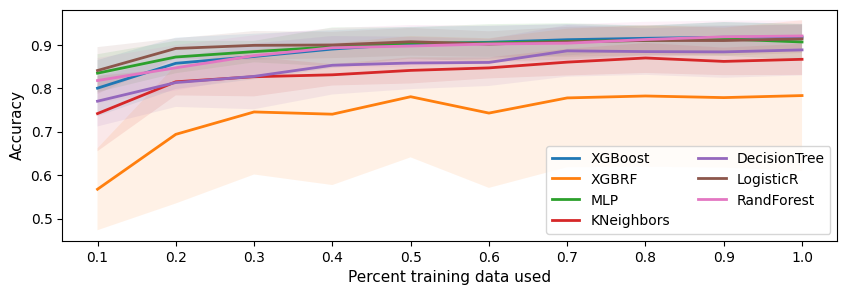

In [68]:
users = set(df_lim['id'])

accs_by_model = {mn: [] for mn in model_labels}
for user in users:
    accs = user_metrics[user][0]
    for mn in model_labels:
        accs_by_model[mn].append(accs[mn][0])


# steps = int(0.3*len(df_lim[df_lim.user])/10)
# xs = list(range(steps, len(X_train), steps))

plt.figure(figsize=(10,3))
for mn in model_labels:
    # ms = np.mean(accs_by_model[mn], axis=0)
    ms, es = [], []
    for i in range(10):
        accs = [accs_by_model[mn][j][i] for j in range(15) if i < len(accs_by_model[mn][j])]
        # print (accs)
        ms.append(np.mean(accs))
        es.append(np.std(accs))

    ms, es = np.array(ms), np.array(es)
    plt.plot(range(len(ms)), ms, label=mn, linewidth=2)
    plt.fill_between(range(len(ms)), ms-es, ms+es, alpha=0.1)

plt.legend(ncols=2)
plt.xticks(range(len(ms)), np.round(np.linspace(0.1, 1, 10), 2))
plt.xlabel("Percent training data used", fontsize=11)
plt.ylabel("Accuracy", fontsize=11)
# plt.ylim([0.7, 1])
# 
# plt.savefig('./acc_by_iter_study_two.pdf', bbox_inches='tight')

In [45]:
np.linspace(10, 100, 10)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

### hard and easy

In [11]:
valence = {'life': 1, 'crim': -1, 'alco': -1, 'dep': 1}
# valence = {'elderlyDep': 1,'lifeYearsGained': 1, 'obesity': -1, 'weeklyWorkhours': 1, 'yearsWaiting': 1}

diffcols = ['lifediff', 'crimdiff', 'alcodiff', 'depdiff']
# diffcols = ['eldepdiff', 'lifediff', 'obesdiff', 'workdiff', 'wa itdiff']

def easy_dominating(row):
    feats = {f: diffcols[i] for i, f in enumerate(valence.keys())}
    signs = [valence[f]*row[feats[f]] for f in valence.keys()]
    signs2 = []
    for s in signs:
        if s > 0:
            signs2.append(1)
        elif s < 0:
            signs2.append(-1)
        else:
            signs2.append(0)

    # print ([s >= 0 for s in signs2])
    if sum(signs2) > 0 and all([s >= 0 for s in signs2]):
        return True

    if sum(signs2) < 0 and all([s <= 0 for s in signs2]):
        return True
    
    return False

def easy_uncontroversial(df):
    feats = {f: diffcols[i] for i, f in enumerate(valence.keys())}
    diff_feats = list(feats.values())
    # diff_feats = diffcols

    df_lim = df[diff_feats]

def easy_deviation(row, df, threshold=0.5):
    feats = {f: diffcols[i] for i, f in enumerate(valence.keys())}
    diff_feats = list(feats.values())

    ms = {f: np.mean(df[f]) for f in diff_feats}
    es = {f: np.std(df[f]) for f in diff_feats}

    # df_sub = df.copy()
    row_norm = {}
    for f in diff_feats:
        row_norm[f] = (row[f] - ms[f])/es[f]

    # diff = sum([row_norm[f]*valence[f[:-4]] for f in diff_feats])

    diff = sum([row_norm[diff_feats[i]]*valence[f] for i, f in enumerate(valence.keys())])
    if np.abs(diff) > threshold:
        return True

    return False

In [13]:
idvar = "uid" if study=="one" else "id"
users = set(df_lim[idvar])

# for user in tqdm(users):
#     df_user = df_lim[df_lim['uid'] == user]

easy_rows = []
# for index, row in df_lim.iterrows():
    # easy_rows.append(easy_dominating(row))

for index, row in df_lim.iterrows():
    easy_rows.append(easy_deviation(row, df_lim, 1))

df_lim['easy_rows'] = easy_rows

    

In [14]:
np.mean(df_lim['easy_rows'])

0.5666666666666667

In [10]:
model_results = []

for user in tqdm(users):
    df_user = df_lim[df_lim['id'] == user]

    for mn, model in user_models[user].items():        

        X = df_user[df_user['easy_rows']==True].drop('chosen', axis=1)
        y = df_user[df_user['easy_rows']==True]['chosen']
        acc = model[0].score(X.to_numpy()[:, :-1], y)
        model_results.append([user, mn, True, acc])

        X = df_user[df_user['easy_rows']==False].drop('chosen', axis=1)
        y = df_user[df_user['easy_rows']==False]['chosen']
        acc = model[0].score(X.to_numpy()[:, :-1], y)
        model_results.append([user, mn, False, acc])

model_results = pd.DataFrame(data=model_results, columns=["id", "model_name", "easy_rows", "acc"])
mns = model_results["model_name"].unique()

for mn in mns:
    xs, ys = [], []
    res = model_results[model_results['model_name'] == mn]
    for user in (users):
        res_user = res[res.id == user]
        xs.append(res_user[res_user['easy_rows']==True]['acc'].item())
        ys.append(res_user[res_user['easy_rows']==False]['acc'].item())
        
    plt.scatter(xs, ys, label=mn)


plt.xlabel("Easy: True")
plt.ylabel("Easy: False")
plt.ylim([0.7,1.04])
plt.xlim([0.7,1.04])
plt.axline([0, 0], [1, 1], color="black", alpha=0.2)
plt.legend()

NameError: name 'users' is not defined

  0%|          | 0/40 [00:00<?, ?it/s]

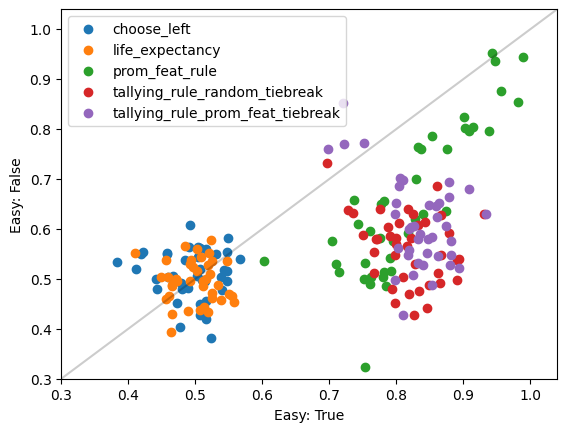

In [86]:
heuristic_results = []

for user in tqdm(users):
    df_user = df_lim[df_lim['id'] == user]

    for mn, model in user_heuristics[user].items():        

        X = df_user[df_user['easy_rows']==True].drop('chosen', axis=1)
        y = df_user[df_user['easy_rows']==True]['chosen']
        acc = model[0].score(X, y)
        heuristic_results.append([user, mn, True, acc])

        X = df_user[df_user['easy_rows']==False].drop('chosen', axis=1)
        y = df_user[df_user['easy_rows']==False]['chosen']
        acc = model[0].score(X, y)
        heuristic_results.append([user, mn, False, acc])
        
heuristic_results = pd.DataFrame(data=heuristic_results, columns=["id", "model_name", "easy_rows", "acc"])
mns = heuristic_results["model_name"].unique()

for mn in mns:
    xs, ys = [], []
    res = heuristic_results[heuristic_results['model_name'] == mn]
    for user in (users):
        res_user = res[res.id == user]
        xs.append(res_user[res_user['easy_rows']==True]['acc'].item())
        ys.append(res_user[res_user['easy_rows']==False]['acc'].item())
        
    plt.scatter(xs, ys, label=mn)


plt.xlabel("Easy: True")
plt.ylabel("Easy: False")
plt.ylim([0.3,1.04])
plt.xlim([0.3,1.04])
plt.axline([0, 0], [1, 1], color="black", alpha=0.2)
plt.legend()

  0%|          | 0/15 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


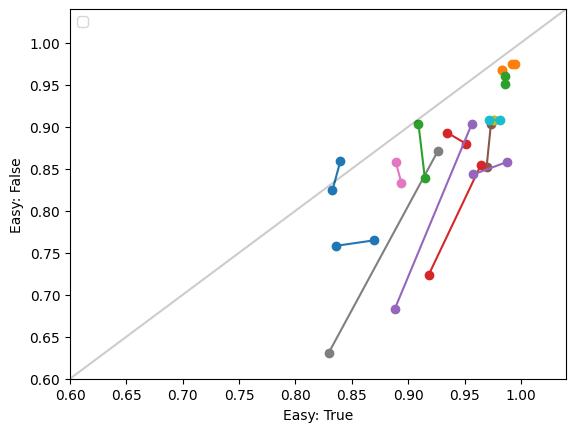

In [133]:
results = []

for user in tqdm(users):
    df_user = df_lim[df_lim['uid'] == user]

    mn = "LogisticR"
    model = user_models[user][mn]       

    X = df_user[df_user['easy_rows']==True].drop('chosen', axis=1)
    y = df_user[df_user['easy_rows']==True]['chosen']
    acc1 = model[0].score(X, y)
    results.append([user, mn, True, acc])

    X = df_user[df_user['easy_rows']==False].drop('chosen', axis=1)
    y = df_user[df_user['easy_rows']==False]['chosen']
    acc2 = model[0].score(X, y)
    results.append([user, mn, False, acc])
        
    mn = "prom_feat_rule"
    model = user_heuristics[user][mn]       

    X = df_user[df_user['easy_rows']==True].drop('chosen', axis=1)
    y = df_user[df_user['easy_rows']==True]['chosen']
    acc3 = model[0].score(X, y)
    results.append([user, mn, True, acc])

    X = df_user[df_user['easy_rows']==False].drop('chosen', axis=1)
    y = df_user[df_user['easy_rows']==False]['chosen']
    acc4 = model[0].score(X, y)
    results.append([user, mn, False, acc])

    xs, ys = [acc1, acc3], [acc2, acc4]
    plt.plot(xs, ys, "-o")

# results = pd.DataFrame(data=results, columns=["uid", "model_name", "easy_rows", "acc"])
# mns = results["model_name"].unique()

# for mn in mns:
#     xs, ys = [], []
#     res = results[results['model_name'] == mn]
#     for user in (users):
#         res_user = res[res.uid == user]
#         xs.append(res_user[res_user['easy_rows']==True]['acc'].item())
#         ys.append(res_user[res_user['easy_rows']==False]['acc'].item())
        
#     plt.scatter(xs, ys, label=mn)


plt.xlabel("Easy: True")
plt.ylabel("Easy: False")
plt.ylim([0.6,1.04])
plt.xlim([0.6,1.04])
plt.axline([0, 0], [1, 1], color="black", alpha=0.2)
plt.legend()

In [315]:
import sklearn

idvar = "uid" if study=="one" else "id"
users = set(df_lim[idvar])

if study == "one":
    valence = {'life': 1, 'crim': -1, 'alco': -1, 'dep': 1}
    diffcols = ['lifediff', 'crimdiff', 'alcodiff', 'depdiff']
else:
    valence = {'elderlyDep': 1,'lifeYearsGained': 1, 'obesity': -1, 'weeklyWorkhours': 1, 'yearsWaiting': 1}
    diffcols = ['eldepdiff', 'lifediff', 'obesdiff', 'workdiff', 'waitdiff']



In [299]:

def user_logit_scores(df_user):
    df_user = df_user[diffcols + ["chosen"]]
    df_user['score'] = 0
    
    indices = list(range(len(df_user)))
    step = int(len(indices)/5)
    
    for r in range(5):
    
        test = indices[r*step:(r+1)*step]
        train = [i for i in indices if i not in test]
        
        # train, test = sklearn.model_selection.train_test_split(indices, test_size=0.2)
    
        logm = LogisticRegression(fit_intercept=False).fit(df_user.iloc[train][diffcols], df_user.iloc[train]['chosen'])
        coefs = logm.coef_[0]
        coefs = coefs/np.linalg.norm(coefs)
        score = 0
        for i, col in enumerate(diffcols):
            score += coefs[i] * df_user.iloc[test][col]
    
        all_scores = []
        for i, ind in enumerate(df_user.index):
            if i in test:
                all_scores.append(np.abs(score[ind]))
            else:
                all_scores.append(0)
            
        df_user['score'] += np.array(all_scores)
    return df_user['score']

model_results = []

for user in tqdm(users):
    df_user = df_lim[df_lim[idvar] == user]

    # df_user['score'] = np.abs(user_logit_scores(df_user, df_user))
    
    df_user['score'] = user_logit_scores(df_user)
    threshold = np.median(df_user['score'])
    df_user['easy_rows'] = df_user['score'] > threshold
    
    # print (np.mean(easy_rows))
    
    for mn, model in user_models[user].items():        

        X = df_user[df_user['easy_rows']==True].drop('chosen', axis=1)
        y = df_user[df_user['easy_rows']==True]['chosen']
        
        acc = model[0].score(X.to_numpy()[:, :-3], y)
        model_results.append([user, mn, True, acc])

        X = df_user[df_user['easy_rows']==False].drop('chosen', axis=1)
        y = df_user[df_user['easy_rows']==False]['chosen']
        acc = model[0].score(X.to_numpy()[:, :-3], y)
        model_results.append([user, mn, False, acc])

model_results = pd.DataFrame(data=model_results, columns=["id", "model_name", "easy_rows", "acc"])


  0%|          | 0/15 [00:00<?, ?it/s]

In [301]:
model_results

,id,model_name,easy_rows,acc
0,4,XGBoost,True,0.927778
1,4,XGBoost,False,0.872222
2,4,XGBRF,True,0.888889
3,4,XGBRF,False,0.816667
4,4,MLP,True,0.955556
...,...,...,...,...
205,28,DecisionTree,False,0.773333
206,28,LogisticR,True,1.000000
207,28,LogisticR,False,0.873333
208,28,RandForest,True,1.000000


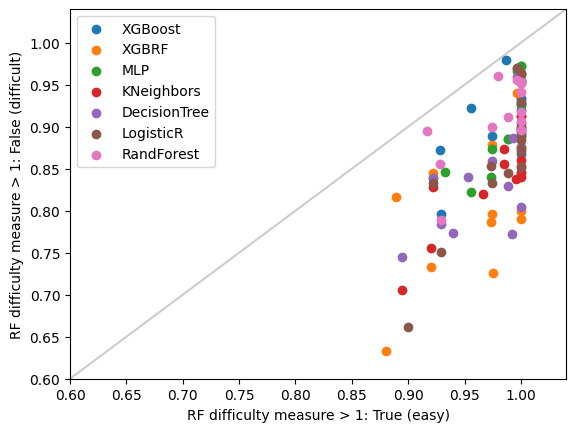

In [302]:
mns = model_results["model_name"].unique()

for mn in mns:
    xs, ys = [], []
    res = model_results[model_results['model_name'] == mn]
    
    for user in (users):
        res_user = res[res.id == user]
        xs.append(res_user[res_user['easy_rows']==True]['acc'].item())
        ys.append(res_user[res_user['easy_rows']==False]['acc'].item())
        
    plt.scatter(xs, ys, label=mn)

plt.xlabel(cond_label+": True (easy)")
plt.ylabel(cond_label+": False (difficult)")
plt.ylim([0.6,1.04])
plt.xlim([0.6,1.04])
plt.axline([0, 0], [1, 1], color="black", alpha=0.2)
plt.legend()
# plt.title(method_label)



In [495]:
model_results = []

for user in tqdm(users):
    df_user = df_lim[df_lim[idvar] == user]

    # df_user['score'] = np.abs(user_logit_scores(df_user, df_user))
    
    # df_user['score'] = user_logit_scores(df_user)
    # threshold1 = np.quantile(df_user['score'], 0.33)
    # threshold2 = np.quantile(df_user['score'], 0.66)
    # df_user['first_quantile'] = df_user['score'] < threshold1
    # df_user['second_quantile'] = (df_user['score'] > threshold1) & (df_user['score'] < threshold2)
    # df_user['third_quantile'] = df_user['score'] > threshold2
    
    # print (np.mean(easy_rows))
    
    for mn, model in user_models[user].items():        

        # X = df_user[df_user['first_quantile']==True].drop('chosen', axis=1)
        # y = df_user[df_user['first_quantile']==True]['chosen']
        # acc = model[0].score(X.to_numpy()[:, :-5], y)
        model_results.append([user, mn, "one", user_metrics[user][1][mn][0]])

        # X = df_user[df_user['second_quantile']==True].drop('chosen', axis=1)
        # y = df_user[df_user['second_quantile']==True]['chosen']
        # acc = model[0].score(X.to_numpy()[:, :-5], y)
        model_results.append([user, mn, "two", user_metrics[user][1][mn][1]])

        # X = df_user[df_user['third_quantile']==True].drop('chosen', axis=1)
        # y = df_user[df_user['third_quantile']==True]['chosen']
        # acc = model[0].score(X.to_numpy()[:, :-5], y)
        model_results.append([user, mn, "three", user_metrics[user][1][mn][2]])

model_results = pd.DataFrame(data=model_results, columns=["id", "model_name", "quant", "acc"])
mns = model_results["model_name"].unique()
    # plt.scatter(xs, ys, label=mn)
    

two_model_results = []

for user in tqdm(two_user_metrics.keys()):
    # df_user = df_lim[df_lim[idvar] == user]

    # df_user['score'] = np.abs(user_logit_scores(df_user, df_user))
    
    # df_user['score'] = user_logit_scores(df_user)
    # threshold1 = np.quantile(df_user['score'], 0.33)
    # threshold2 = np.quantile(df_user['score'], 0.66)
    # df_user['first_quantile'] = df_user['score'] < threshold1
    # df_user['second_quantile'] = (df_user['score'] > threshold1) & (df_user['score'] < threshold2)
    # df_user['third_quantile'] = df_user['score'] > threshold2
    
    # print (np.mean(easy_rows))
    
    for mn in mns:        

        # X = df_user[df_user['first_quantile']==True].drop('chosen', axis=1)
        # y = df_user[df_user['first_quantile']==True]['chosen']
        # acc = model[0].score(X.to_numpy()[:, :-5], y)
        two_model_results.append([user, mn, "one", two_user_metrics[user][1][mn][0]])

        # X = df_user[df_user['second_quantile']==True].drop('chosen', axis=1)
        # y = df_user[df_user['second_quantile']==True]['chosen']
        # acc = model[0].score(X.to_numpy()[:, :-5], y)
        two_model_results.append([user, mn, "two", two_user_metrics[user][1][mn][1]])

        # X = df_user[df_user['third_quantile']==True].drop('chosen', axis=1)
        # y = df_user[df_user['third_quantile']==True]['chosen']
        # acc = model[0].score(X.to_numpy()[:, :-5], y)
        two_model_results.append([user, mn, "three", two_user_metrics[user][1][mn][2]])

two_model_results = pd.DataFrame(data=two_model_results, columns=["id", "model_name", "quant", "acc"])
mns = model_results["model_name"].unique()
    # plt.scatter(xs, ys, label=mn)
    


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [327]:
# model_results.to_csv('data/two_model_results_difficulty.csv', index_label=False)
# one_model_results_difficulty = pd.read_csv('data/one_model_results_difficulty.csv')
# one_model_results_difficulty

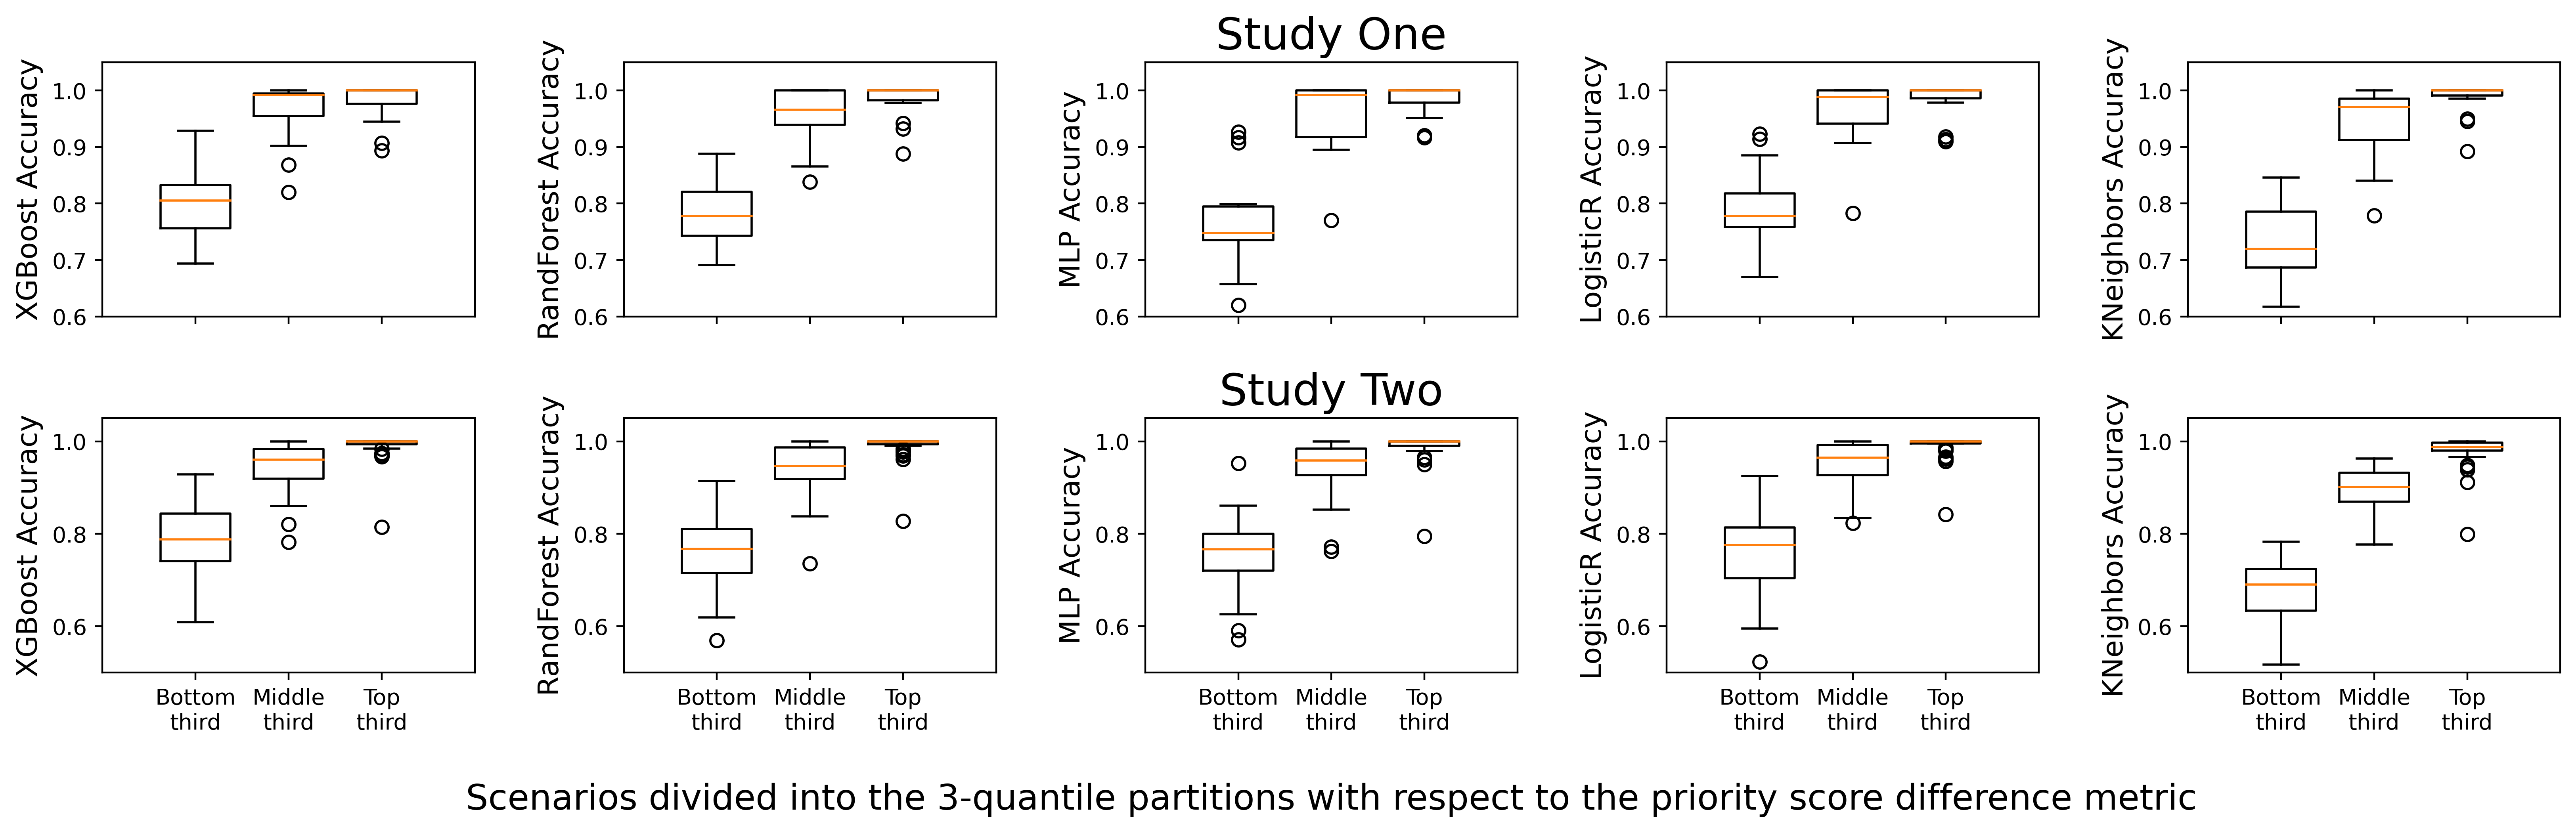

In [512]:
plt.figure(figsize=(20,5), dpi=400)
mns_to_plot = ['XGBoost', 'RandForest', 'MLP', 'LogisticR', 'KNeighbors']

for j, mn in enumerate(mns_to_plot):
    xs1, xs2, xs3 = [], [], []
    res = model_results[model_results['model_name'] == mn]
    users_one = res["id"].unique()
    for user in (users_one):
        res_user = res[res.id == user]
        xs1.append(res_user[res_user['quant']=="one"]['acc'].item())
        xs2.append(res_user[res_user['quant']=="two"]['acc'].item())
        xs3.append(res_user[res_user['quant']=="three"]['acc'].item())

    plt.subplot(2,5,1+j)
    
    # if j>1:
    #     plt.boxplot([xs1, xs2], positions=[1, 1.3], labels=["Scenarios with\n perceived difficulty in\n the top third", 
    #                                          "Scenarios with\n perceived difficulty in\n the middle third"])
    # else:
    plt.boxplot([xs1, xs2, xs3], positions=[1, 1.2, 1.4], labels=["", "", ""])

    if j == 2:
        plt.title("Study One", fontsize=20)
        
    plt.ylabel(mn + " Accuracy", fontsize=13)
    plt.ylim([0.6, 1.05])
    plt.xlim([0.8, 1.6])
    # plt.title(mn, )

for j, mn in enumerate(mns_to_plot):
    xs1, xs2, xs3 = [], [], []
    res = two_model_results[two_model_results['model_name'] == mn]
    users_two = res["id"].unique()    
    for user in (users_two):
        res_user = res[res.id == user]
        xs1.append(res_user[res_user['quant']=="one"]['acc'].item())
        xs2.append(res_user[res_user['quant']=="two"]['acc'].item())
        xs3.append(res_user[res_user['quant']=="three"]['acc'].item())

    plt.subplot(2,5,6+j)
    
    # if j>1:
    #     plt.boxplot([xs1, xs2], labels=["Scenarios with\n perceived difficulty in\n the top third", 
    #                                          "Scenarios with\n perceived difficulty in\n the middle third"])
    # else:
    # plt.boxplot([xs1, xs2], positions=[1, 1.3], labels=["Scenarios w/\n response time\n $<$ median", "Scenarios w/\n response time\n $\geq$ median"])
    
    plt.boxplot([xs1, xs2, xs3], positions=[1, 1.2, 1.4], labels=["Bottom\nthird", "Middle\nthird", "Top\nthird"])

    if j == 2:
        plt.title("\nStudy Two", fontsize=20)
        
    plt.ylabel(mn + " Accuracy", fontsize=13)
    plt.ylim([0.5, 1.05])
    plt.xlim([0.8, 1.6])
    # plt.title(mn, )

    if j==2:
        plt.xlabel("\nScenarios divided into the 3-quantile partitions with respect to the priority score difference metric", fontsize=16)


plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.savefig('images/acc_by_diff_score.pdf', bbox_inches="tight")

In [135]:
mode

,uid,lalco,ldep,llife,lcrim,ralco,rdep,rlife,rcrim,chosen,alcodiff,depdiff,lifediff,crimdiff,easy_rows,score,first_quantile,second_quantile,third_quantile
3000,4,0,0,2,1,0,0,3,1,0,0,0,-1,0,False,0.080959,True,False,False
3001,4,0,1,3,1,4,2,1,2,0,-4,-1,2,-1,True,0.749351,False,True,False
3002,4,0,1,2,1,0,1,1,1,0,0,0,1,0,False,0.080959,True,False,False
3003,4,4,1,1,2,2,0,3,2,1,2,1,-2,0,True,0.214568,True,False,False
3004,4,0,1,2,0,4,2,2,0,0,-4,-1,0,0,False,0.789830,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,4,0,2,3,0,2,0,3,1,1,-2,2,0,-1,True,2.521237,False,False,True
6776,4,2,0,2,1,0,2,3,2,0,2,-2,-1,-1,True,2.226196,False,False,True
6777,4,2,2,1,1,2,1,1,0,0,0,1,0,1,False,0.863741,False,True,False
6778,4,2,2,3,1,2,0,1,1,1,0,2,2,0,True,1.680689,False,False,True


In [437]:
user_metrics[1][2]

{'XGBoost': (0.8886367052482678, 0.8203476677172616),
 'XGBRF': (0.793972784116905, 0.7662547555943926),
 'MLP': (0.8928384687208217, 0.7980658230658231),
 'KNeighbors': (0.8362435913129452, 0.7427745969270798),
 'DecisionTree': (0.8178153898175511, 0.7225160868615174),
 'LogisticR': (0.8779167206583438, 0.8112819207127474),
 'RandForest': (0.8961804523989052, 0.7794389096698333)}

In [491]:
model_results = []

for user in tqdm(users):
    df_user = df_lim[df_lim[idvar] == user]
    
    threshold1 = np.quantile(df_user['secElasped'], 0.5)
    df_user['first_half'] = df_user['secElasped'] < threshold1
        
    for mn, model in user_models[user].items():        

        # X = df_user[df_user['first_half']==True].drop('chosen', axis=1)
        # y = df_user[df_user['first_half']==True]['chosen']
        # acc = model[0].score(X.to_numpy()[:, :-2], y)
        model_results.append([user, mn, "one", user_metrics[user][2][mn][0]])

        # X = df_user[df_user['first_half']==False].drop('chosen', axis=1)
        # y = df_user[df_user['first_half']==False]['chosen']
        # acc = model[0].score(X.to_numpy()[:, :-2], y)
        model_results.append([user, mn, "two", user_metrics[user][2][mn][1]])

model_results = pd.DataFrame(data=model_results, columns=["id", "model_name", "quant", "acc"])
mns = model_results["model_name"].unique()
    # plt.scatter(xs, ys, label=mn)
    

two_model_results = []

for user in tqdm(two_user_metrics.keys()):
    # df_user = df_lim[df_lim[idvar] == user]
    
    # threshold1 = np.quantile(df_user['secElasped'], 0.5)
    # df_user['first_half'] = df_user['secElasped'] < threshold1
        
    for mn in mns:        

        two_model_results.append([user, mn, "one", two_user_metrics[user][2][mn][0]])
        two_model_results.append([user, mn, "two", two_user_metrics[user][2][mn][1]])

two_model_results = pd.DataFrame(data=two_model_results, columns=["id", "model_name", "quant", "acc"])
# mns = two_model_results["model_name"].unique()
    # plt.scatter(xs, ys, label=mn)
    


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [461]:
# model_results.to_csv('data/one_model_results_response_time.csv', index_label=False)

# one_model_results_response_time = pd.read_csv('data/one_model_results_response_time.csv')
# one_model_results_response_time


{1: [{'XGBoost': (0.8567901234567901, 0.0322881403225235),
   'XGBRF': (0.7814814814814814, 0.06891499129359438),
   'MLP': (0.8481481481481481, 0.023618674653961714),
   'KNeighbors': (0.791358024691358, 0.011969579894855151),
   'DecisionTree': (0.7703703703703704, 0.03773014022206453),
   'LogisticR': (0.8456790123456791, 0.020658272260100658),
   'RandForest': (0.8382716049382715, 0.022562551706786515)},
  {'XGBoost': (0.6823828288289998, 0.9124805194805194, 0.967262450810838),
   'XGBRF': (0.6092820512820513, 0.824894358427793, 0.8994632079261521),
   'MLP': (0.6335734705546026, 0.9038195000587287, 0.9852386363636363),
   'KNeighbors': (0.6059546411507086, 0.8258137940490882, 0.9483694980771421),
   'DecisionTree': (0.5391365967617918, 0.8141562099228002, 0.941673740803622),
   'LogisticR': (0.6698037965026552, 0.9165351309400295, 0.9626423919840168),
   'RandForest': (0.6707627539636432, 0.9141123301090488, 0.9606702989943834)},
  {'XGBoost': (0.8886367052482678, 0.82034766771726

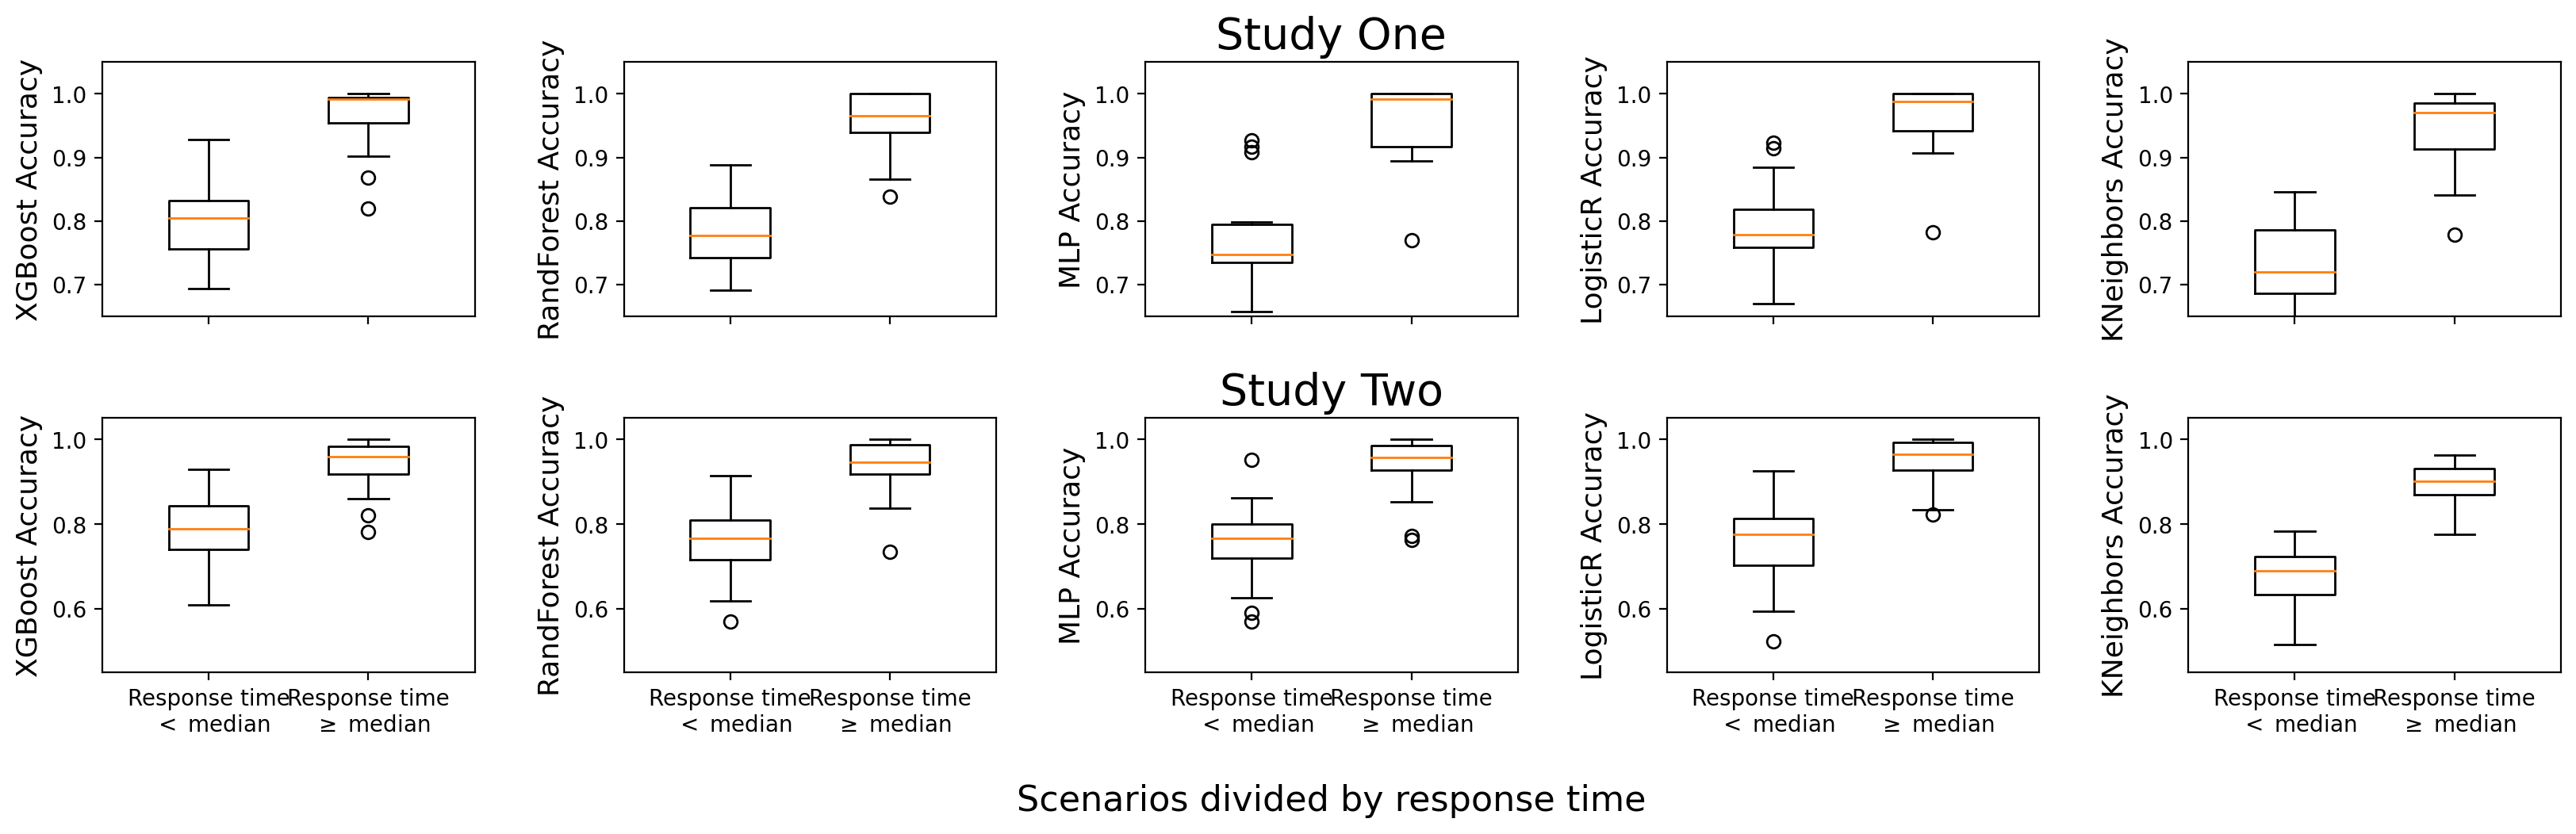

In [516]:
plt.figure(figsize=(20,5), dpi=200)
mns_to_plot = ['XGBoost', 'RandForest', 'MLP', 'LogisticR', 'KNeighbors']

for j, mn in enumerate(mns_to_plot):
    xs1, xs2, xs3 = [], [], []
    res = model_results[model_results['model_name'] == mn]
    users_one = res["id"].unique()
    for user in (users_one):
        res_user = res[res.id == user]
        xs1.append(res_user[res_user['quant']=="one"]['acc'].item())
        xs2.append(res_user[res_user['quant']=="two"]['acc'].item())

    plt.subplot(2,5,1+j)
    
    # if j>1:
    #     plt.boxplot([xs1, xs2], positions=[1, 1.3], labels=["Scenarios with\n perceived difficulty in\n the top third", 
    #                                          "Scenarios with\n perceived difficulty in\n the middle third"])
    # else:
    plt.boxplot([xs1, xs2], positions=[1, 1.3], labels=["", ""])

    if j == 2:
        plt.title("Study One", fontsize=20)
        
    plt.ylabel(mn + " Accuracy", fontsize=13)
    plt.ylim([0.65, 1.05])
    plt.xlim([0.8, 1.5])
    # plt.title(mn, )

for j, mn in enumerate(mns_to_plot):
    xs1, xs2, xs3 = [], [], []
    res = two_model_results[two_model_results['model_name'] == mn]
    users_two = res["id"].unique()    
    for user in (users_two):
        res_user = res[res.id == user]
        xs1.append(res_user[res_user['quant']=="one"]['acc'].item())
        xs2.append(res_user[res_user['quant']=="two"]['acc'].item())

    plt.subplot(2,5,6+j)
    
    # if j>1:
    #     plt.boxplot([xs1, xs2], labels=["Scenarios with\n perceived difficulty in\n the top third", 
    #                                          "Scenarios with\n perceived difficulty in\n the middle third"])
    # else:
    plt.boxplot([xs1, xs2], positions=[1, 1.3], labels=["Response time\n $<$ median", "Response time\n $\geq$ median"])
    if j == 2:
        plt.title("\nStudy Two", fontsize=20)
        
    plt.ylabel(mn + " Accuracy", fontsize=13)
    plt.ylim([0.45, 1.05])
    plt.xlim([0.8, 1.5])
    # plt.title(mn, )
    if j==2:
        plt.xlabel("\nScenarios divided by response time", fontsize=16)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
# plt.savefig('images/acc_by_response_time.pdf', bbox_inches="tight")

In [333]:
res_user

,id,model_name,quant,acc


In [189]:
import shap

In [547]:

def user_logit_nfeats(df_user):
    df_user = df_user[diffcols + ["chosen"]]
    df_user['score'] = 0
    
    indices = list(range(len(df_user)))
    step = int(len(indices)/5)

    coefs = []
    for r in range(5):
    
        test = indices[r*step:(r+1)*step]
        train = [i for i in indices if i not in test]
        
        # train, test = sklearn.model_selection.train_test_split(indices, test_size=0.2)
    
        logm = LogisticRegression(fit_intercept=False).fit(df_user.iloc[train][diffcols], df_user.iloc[train]['chosen'])
        coef = logm.coef_[0]
        coef = coef/np.linalg.norm(coef, ord=1)
        coefs.append(coef)

    coefs = np.array(coefs)
    return np.mean(coefs, axis=0)

one_model_results = []
for user in tqdm(one_user_metrics.keys()):
    # df_user = df_lim[df_lim[idvar] == user]
    # n_feats = user_logit_nfeats(df_user)
    # # nf = sum([0 if abs(c)<0.1 else 1 for c in n_feats])

    n_feats = one_user_nfeats[user]
    n_feats = sorted(np.abs(n_feats), reverse=True)
    nf = sum([1 if sum(n_feats[:i+1])<=0.90 else 0 for i in range(len(n_feats))])+1
    
    # print (nf, n_feats)
    
    for mn in mns:        

        X = df_user.drop('chosen', axis=1)
        y = df_user['chosen']
        # acc = model[0].score(X.to_numpy()[:, :-1], y)
        acc = one_user_metrics[user][0][mn][0]
        # print (acc)

        # shap.Explainer(model[0], X)
        
        one_model_results.append([user, mn, nf, acc])

        # break
    # break
    

one_model_results = pd.DataFrame(data=one_model_results, columns=["id", "model_name", "nf", "acc"])
mns = one_model_results["model_name"].unique()


user_nfeats = {}
two_model_results = []
for user in tqdm(two_user_metrics.keys()):
    df_user = df_lim[df_lim[idvar] == user]
    n_feats = user_logit_nfeats(df_user)
    # nf = sum([0 if abs(c)<0.1 else 1 for c in n_feats])
    
    n_feats = sorted(np.abs(n_feats), reverse=True)
    nf = sum([1 if sum(n_feats[:i+1])<=0.90 else 0 for i in range(len(n_feats))])+1
    user_nfeats[user] = list(n_feats)
    
    # print (nf, n_feats)
    
    for mn in mns:        

        X = df_user.drop('chosen', axis=1)
        y = df_user['chosen']
        # acc = model[0].score(X.to_numpy()[:, :-1], y)
        acc = two_user_metrics[user][0][mn][0]
        # print (acc)

        # shap.Explainer(model[0], X)
        
        two_model_results.append([user, mn, nf, acc])

        # break
    # break
    

two_model_results = pd.DataFrame(data=two_model_results, columns=["id", "model_name", "nf", "acc"])
mns = two_model_results["model_name"].unique()
    # plt.scatter(xs, ys, label=mn)



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [538]:
# model_results.to_csv('data/one_model_results_nfeats.csv', index_label=False)
# model_results = pd.read_csv('data/one_model_results_difficulty.csv')
# user_metrics[user]

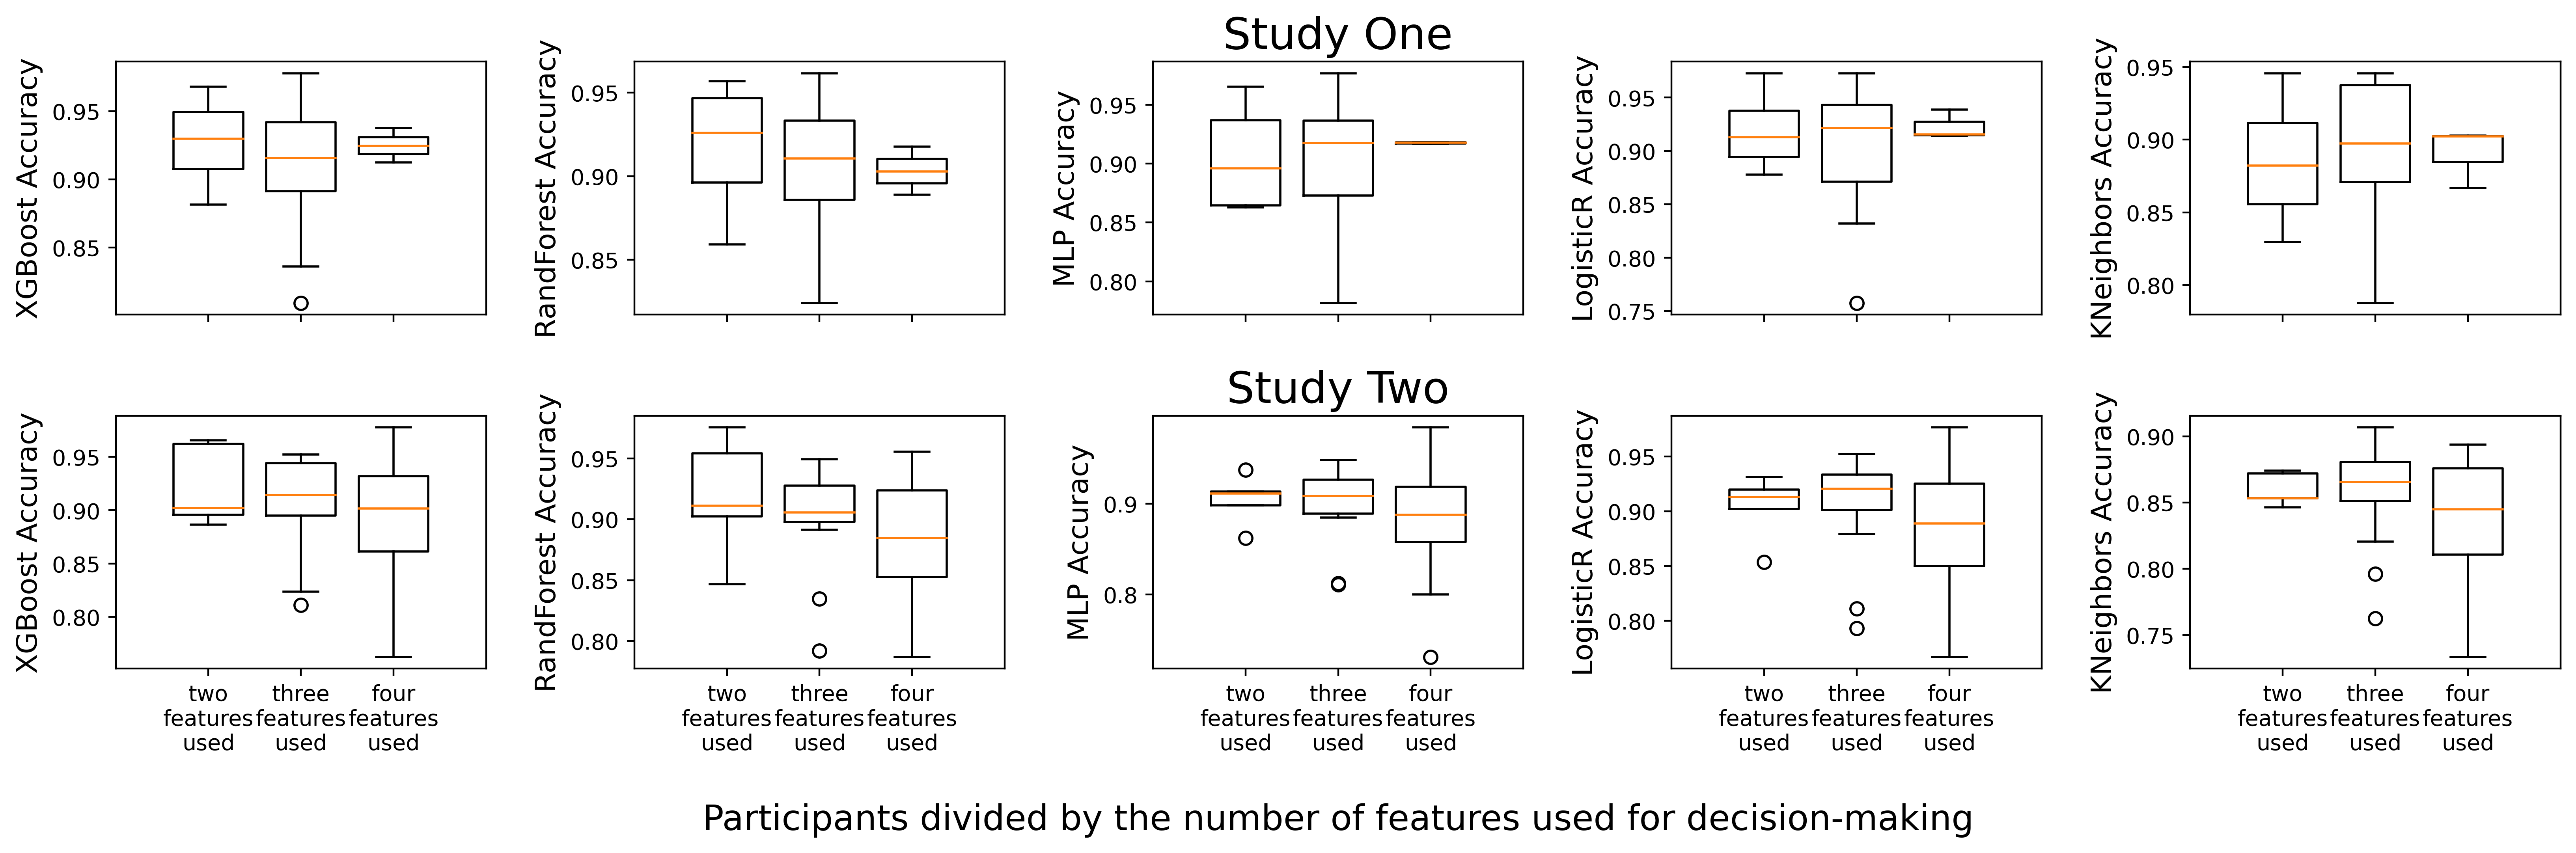

In [557]:
# plt.figure(figsize=(20,5), dpi=200)
# mns_to_plot = ['XGBoost', 'RandForest', 'MLP', 'LogisticR', 'KNeighbors']

# for j, mn in enumerate(mns_to_plot):
#     xs1, xs2, xs3 = [], [], []
#     res = two_model_results[two_model_results['model_name'] == mn]
#     xs1 += list(res[res['nf']==2]['acc'])
#     xs2 += list(res[res['nf']==3]['acc'])
#     xs3 += list(res[res['nf']==4]['acc'])

#     plt.subplot(151+j)
    
#     if j>1:
#         plt.boxplot([xs1, xs2, xs3], labels=["two", "three", "four"])
#     else:
#         plt.boxplot([xs1, xs2, xs3], labels=["", "", ""])
        
#     plt.ylabel(mn + " Accuracy")
#     plt.ylim([0.65, 1.05])
#     # plt.title(mn, )


plt.figure(figsize=(20,5), dpi=400)
mns_to_plot = ['XGBoost', 'RandForest', 'MLP', 'LogisticR', 'KNeighbors']

for j, mn in enumerate(mns_to_plot):
    xs1, xs2, xs3 = [], [], []
    res = one_model_results[one_model_results['model_name'] == mn]
    
    xs1 += list(res[res['nf']==2]['acc'])
    xs2 += list(res[res['nf']==3]['acc'])
    xs3 += list(res[res['nf']==4]['acc'])

    plt.subplot(2,5,1+j)
    
    plt.boxplot([xs1, xs2, xs3], positions=[1, 1.2, 1.4], labels=["", "", ""])

    if j == 2:
        plt.title("Study One", fontsize=20)
        
    plt.ylabel(mn + " Accuracy", fontsize=13)
    # plt.ylim([0.6, 1.05])
    plt.xlim([0.8, 1.6])
    # plt.title(mn, )

for j, mn in enumerate(mns_to_plot):
    xs1, xs2, xs3 = [], [], []
    res = two_model_results[two_model_results['model_name'] == mn]
    
    xs1 += list(res[res['nf']==2]['acc'])
    xs2 += list(res[res['nf']==3]['acc'])
    xs3 += list(res[res['nf']==4]['acc'])

    plt.subplot(2,5,6+j)
    
    plt.boxplot([xs1, xs2, xs3], positions=[1, 1.2, 1.4], labels=["two\nfeatures\nused", "three\nfeatures\nused", "four\nfeatures\nused"])

    if j == 2:
        plt.title("\nStudy Two", fontsize=20)
        
    plt.ylabel(mn + " Accuracy", fontsize=13)
    # plt.ylim([0.5, 1.05])
    plt.xlim([0.8, 1.6])
    # plt.title(mn, )

    if j==2:
        plt.xlabel("\nParticipants divided by the number of features used for decision-making", fontsize=16)


plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.savefig('images/acc_by_nf.pdf', bbox_inches="tight")

In [269]:
len(mns)

7

In [546]:
# np.save('data/one_user_metrics.npy', user_metrics)
# np.save('data/one_user_nfeats.npy', user_nfeats)

# two_user_metrics = np.load('two_user_metrics.npy', allow_pickle=True)[()]
one_user_metrics = np.load('data/one_user_metrics.npy', allow_pickle=True)[()]
one_user_nfeats = np.load('data/one_user_nfeats.npy', allow_pickle=True)[()]
# user_metrics